In [11]:
%display latex

In [12]:
#Paso 1: Sea k = 1
#Paso 2 Cuando (k ≤ N) hacer pasos 3 − 7
#Paso 3 Calcular F(x) y J(x), donde J(x)i,j = ∂ fi(x)/∂xj para 1 ≤ i, j ≤ n
#Paso 4 Resolver el sistema lineal n × n con J(x)y = −F(x)
#Paso 5 Sea x = x + y
#Paso 6 If kyk < TOL entonces OUTPUT (x) (EL proceso tuvo éxito.) STOP.
#Paso 7 Set k = k + 1
#Paso 8 OUTPUT (’Número máximo de iteraciones excedido’); (El proceso no tuvoéxito.) STOP


In [13]:
#def NewtonMultivariable (f,)
   #x = var('x')
 #  for k in [1..n]:
  #  F(x)
   # Ji(x) = f.diff(x,)
    #J(x)  = matrix(Ji(x))
   #return

In [14]:
# Newton de una variable
#x = var('x')
f(x) = x^3 - 3*x - 5
fp = diff(f,x)
NewtonIteration(x) = x - (f/fp)(x)
xn = 2;
print(xn);
for i in range(10):
    xn = N(NewtonIteration(xn),digits=20);
    print(xn);

2
2.3333333333333333333
2.2805555555555555556
2.2790200679500897523
2.2790187861674863832
2.2790187861665935795
2.2790187861665935795
2.2790187861665935795
2.2790187861665935795
2.2790187861665935795
2.2790187861665935795


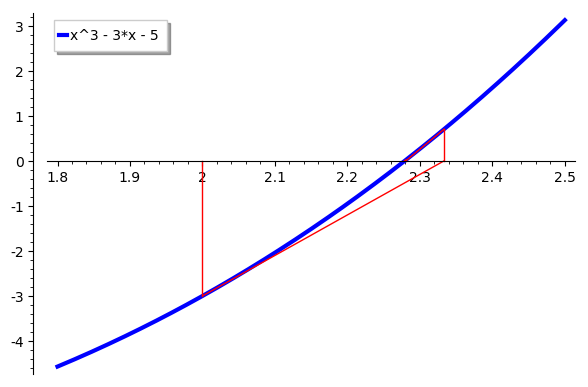

In [15]:
f(x)=x^3 - 3*x - 5
P=plot(f(x),(x,1.8,2.5),thickness=3, legend_label="x^3 - 3*x - 5")
c=2;
for i in range(1,5):
    P+=line([(c,0),(c,f(c))], color='red')+line([(c,f(c)),(c-(f(c)/f.diff(x)(c)),0)], color='red')
    c=c-(f(c)/f.diff(x)(c)) ; c.n()
show(P) 

In [16]:
# Ejemplo Newton no lineal
#x = var('x')
#y = var('y')
#z = var('z')
f1(x,y,z) = 3*x - cos(y*z) - 1/2
f2(x,y,z) = x^2 - 81*(y+0.1)^2 + sin(z) + 1.06
f3(x,y,z) = exp(-x*y) + 20*z + (10*pi-3)/3
show(f1,f2,f3)

(x, y, z) |--> 3*x - cos(y*z) - 1/2 (x, y, z) |--> x^2 - 81*(y + 0.100000000000000)^2 + sin(z) + 1.06000000000000 (x, y, z) |--> 10/3*pi + 20*z + e^(-x*y) - 1

In [17]:
F(x,y,z) = (f1(x,y,z),f2(x,y,z),f3(x,y,z))
show(F)

(x, y, z) |--> (3*x - cos(y*z) - 1/2, x^2 - 81*(y + 0.100000000000000)^2 + sin(z) + 1.06000000000000, 10/3*pi + 20*z + e^(-x*y) - 1)

In [18]:
jacobian(F, F[0].arguments())

[                        (x, y, z) |--> 3                (x, y, z) |--> z*sin(y*z)                (x, y, z) |--> y*sin(y*z)]
[                      (x, y, z) |--> 2*x (x, y, z) |--> -162*y - 16.2000000000000                    (x, y, z) |--> cos(z)]
[              (x, y, z) |--> -y*e^(-x*y)               (x, y, z) |--> -x*e^(-x*y)                        (x, y, z) |--> 20]

In [19]:
F(x,y,z).diff(x,1)

(3, 2*x, -y*e^(-x*y))

In [20]:
t = var('t')
Fx = F.diff(x)
Fy = F.diff(y)
Fz = F.diff(z)
show(Fx,Fy,Fz)

(x, y, z) |--> (3, 2*x, -y*e^(-x*y)) (x, y, z) |--> (z*sin(y*z), -162*y - 16.2000000000000, -x*e^(-x*y)) (x, y, z) |--> (y*sin(y*z), cos(z), 20)

In [21]:
dFx = vector(Fx)
dFy = vector(Fy)
dFz = vector(Fz)
show(dFx,dFy,dFz)

(x, y, z) |--> (3, 2*x, -y*e^(-x*y)) (x, y, z) |--> (z*sin(y*z), -162*y - 16.2000000000000, -x*e^(-x*y)) (x, y, z) |--> (y*sin(y*z), cos(z), 20)

In [22]:
J = Matrix([Fx,Fy,Fz]).transpose()
show(J)

[                        (x, y, z) |--> 3                (x, y, z) |--> z*sin(y*z)                (x, y, z) |--> y*sin(y*z)]
[                      (x, y, z) |--> 2*x (x, y, z) |--> -162*y - 16.2000000000000                    (x, y, z) |--> cos(z)]
[              (x, y, z) |--> -y*e^(-x*y)               (x, y, z) |--> -x*e^(-x*y)                        (x, y, z) |--> 20]

In [23]:
x0 = (0.1,0.1,-0.1)
show(x0)

(0.100000000000000, 0.100000000000000, -0.100000000000000)

In [24]:
F0 = F(0.1,0.1,-0.1)
show(F0)
F(*x0)

(-1.19995000041667, -2.26983341664683, 10/3*pi - 2.00995016625083)

(-1.19995000041667, -2.26983341664683, 10/3*pi - 2.00995016625083)

In [25]:
float(10/3*pi - 2.00995016625083)

8.462025345715148

In [26]:
Fx(0.1,0.1,-0.1)

(3, 0.200000000000000, -0.0990049833749168)

In [27]:
J0 = J(0.1,0.1,-0.1)
show(J0)

[                    3  0.000999983333416667 -0.000999983333416667]
[    0.200000000000000     -32.4000000000000     0.995004165278026]
[  -0.0990049833749168   -0.0990049833749168                    20]

In [28]:
# NewtonIteration(x,y,z) =  - J(x,y,z).inverse()*F(x,y,z)
y0 = J0.solve_right(-F0).simplify()
y0

(-(5.38567099607049e-05)*pi + 0.4000388687707875, -0.005119453090175131*pi - 0.06444991524409016, -0.1666922758392045*pi + 0.1021587572507774)

In [29]:
print(float(-(5.38567099607049e-05)*pi + 0.4000388687707875))
print(float(-0.005119453090175131*pi - 0.06444991524409016))
print(float(-0.1666922758392045*pi + 0.1021587572507774))

0.39986967292642844
-0.08053315146258191
-0.42152047193583075


In [30]:
x1 = (x0[0] + y0[0],x0[1] + y0[1],x0[2] + y0[2])
[float(x1i) for x1i in x1]

[0.4998696729264284, 0.019466848537418088, -0.5215204719358308]

### Alternativa

In [31]:
xk = (x1[0].n(), x1[1].n(), x1[2].n())
for k in [2..10]:
    yk = J(*xk).solve_right(-F(*xk)).simplify()
    xk = (xk[0] + yk[0].n(),xk[1] + yk[1].n(),xk[2] + yk[2].n())
    print(xk)

(0.500014240164219, 0.00158859137029389, -0.523556964347638)
(0.500000113467834, 0.0000124447833215538, -0.523598450072889)
(0.500000000007076, 7.75785727324951e-10, -0.523598775578007)
(0.500000000000000, -3.46944695195361e-18, -0.523598775598299)
(0.500000000000000, -1.04083408558608e-17, -0.523598775598299)
(0.500000000000000, 3.46944695195361e-18, -0.523598775598299)
(0.500000000000000, -3.46944695195361e-18, -0.523598775598299)
(0.500000000000000, -1.04083408558608e-17, -0.523598775598299)
(0.500000000000000, 3.46944695195361e-18, -0.523598775598299)


In [32]:
xk = (x1[0].n(), x1[1].n(), x1[2].n())
for k in [2..10]:
    yk = J(*xk).solve_right(-F(*xk)).simplify()
    xk = (xk[0] + yk[0].n(),xk[1] + yk[1].n(),xk[2] + yk[2].n())
    print(xk)

(0.500014240164219, 0.00158859137029389, -0.523556964347638)
(0.500000113467834, 0.0000124447833215538, -0.523598450072889)
(0.500000000007076, 7.75785727324951e-10, -0.523598775578007)
(0.500000000000000, -3.46944695195361e-18, -0.523598775598299)
(0.500000000000000, -1.04083408558608e-17, -0.523598775598299)
(0.500000000000000, 3.46944695195361e-18, -0.523598775598299)
(0.500000000000000, -3.46944695195361e-18, -0.523598775598299)
(0.500000000000000, -1.04083408558608e-17, -0.523598775598299)
(0.500000000000000, 3.46944695195361e-18, -0.523598775598299)


In [33]:
f(x,y)=x+y
f

(x, y) |--> x + y

In [34]:
f=x+y
f

x + y

In [35]:
def NewtonMetodo(f, x0, n): # -> El zero de f
    xk = x0
    J = jacobian(f, f[0].arguments())
    for k in [1..n]:
        yk = J(*xk).solve_right(-f(*xk))
        xk = [xki.n()+yki.n() for (xki,yki) in zip(xk,yk)]
        #(xk[0] + yk[0].n(),xk[1] + yk[1].n(),xk[2] + yk[2].n())
        print(xk)

In [36]:
NewtonMetodo(F,x0,5)

[0.499869672926428, 0.0194668485374181, -0.521520471935831]
[0.500014240164219, 0.00158859137029389, -0.523556964347638]
[0.500000113467834, 0.0000124447833215573, -0.523598450072889]
[0.500000000007076, 7.75785720386057e-10, -0.523598775578007]
[0.500000000000000, 6.93889390390723e-18, -0.523598775598299]


In [45]:
jacobian(F, F[0].arguments())

[x |--> 2*x - 2]

In [46]:
f(x)=x^2 - 2*x + 1
F(x) = (f(x),)
NewtonMetodo(F,(2,),10)

[1.50000000000000]
[1.25000000000000]
[1.12500000000000]
[1.06250000000000]
[1.03125000000000]
[1.01562500000000]
[1.00781250000000]
[1.00390625000000]
[1.00195312500000]
[1.00097656250000]


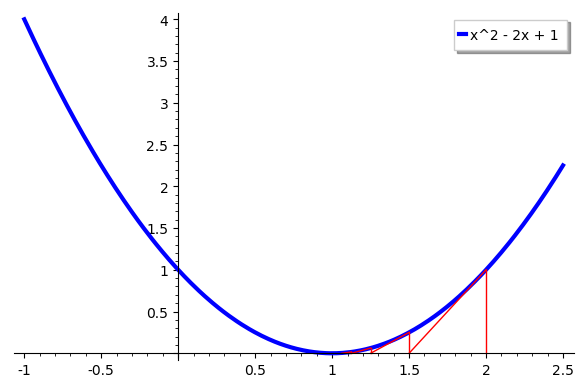

In [40]:
f(x)=x^2 - 2*x + 1
P=plot(f(x),(x,-1,2.5),thickness=3, legend_label="x^2 - 2x + 1")
c=2;
for i in range(1,5):
    P+=line([(c,0),(c,f(c))], color='red')+line([(c,f(c)),(c-(f(c)/f.diff(x)(c)),0)], color='red')
    c=c-(f(c)/f.diff(x)(c)) ; c.n()
show(P) 